<a href="https://colab.research.google.com/github/powersurge8891/Data-mining-with-Python/blob/main/Survial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis

/content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis


In [ ]:
!pip install lifelines

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

Cancer dataset
time: the number of days the patient lived
status: 2(dead), 1(alive)

In [ ]:
dataset=pd.read_csv('lung.csv')
dataset.head(4)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0


Transformation

In [ ]:
dataset.isna().sum()

inst          1
time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 17.9 KB


In [ ]:
dataset.dropna(inplace=True)

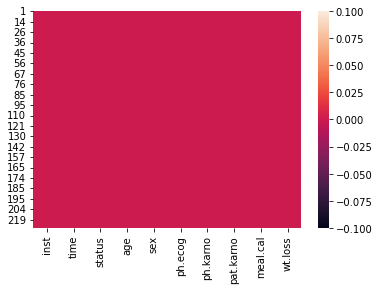

In [ ]:
sns.heatmap(dataset.isna())

In [ ]:
dataset.tail()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
221,11.0,203,1,71,2,1.0,80.0,90.0,1025.0,0.0
224,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0
225,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
226,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0
227,22.0,177,1,58,2,1.0,80.0,90.0,1060.0,0.0


In [ ]:
dataset['status_new']=dataset.status.map({2:1, 1:0})

In [ ]:
dataset.drop(columns='status', inplace=True)

In [ ]:
dataset.head()

,inst,time,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status_new
1,3.0,455,68,1,0.0,90.0,90.0,1225.0,15.0,1
3,5.0,210,57,1,1.0,90.0,60.0,1150.0,11.0,1
5,12.0,1022,74,1,1.0,50.0,80.0,513.0,0.0,0
6,7.0,310,68,2,2.0,70.0,60.0,384.0,10.0,1
7,11.0,361,71,2,2.0,60.0,80.0,538.0,1.0,1


KAPLAN MEIER ESTIMATOR

In [ ]:
from lifelines import KaplanMeierFitter
model= KaplanMeierFitter()
model.fit(durations=dataset.time, event_observed=dataset.status_new)
model.event_table.head(5)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,167,167
5.0,1,1,0,0,167
11.0,1,1,0,0,166
12.0,1,1,0,0,165
13.0,1,1,0,0,164


S(tₗ)= S(tₗ-1)* (1-dₗ/nₗ) : probability of surviving any giving day
where:
S(tₗ) is the probability of survival at time t
dₗ: number of events at time t
nₗ: number of survivals at time t

In [ ]:
#calculating for specific event

#probability of surving day 5
day_5= model.event_table.iloc[1, :]
day_5

removed       1
observed      1
censored      0
entrance      0
at_risk     167
Name: 5.0, dtype: int64

In [ ]:
sur_5=1 *(1-day_5.observed/day_5.at_risk) #note that the probability of surviving the first day is 100% or 1
sur_5.round(3) #thus, the probability of surviving day 5 is 99%

0.994

In [ ]:
# Probability of surviving day 11
day_11= model.event_table.iloc[2, :]
day_11

removed       1
observed      1
censored      0
entrance      0
at_risk     166
Name: 11.0, dtype: int64

In [ ]:
surv_11= sur_5*(1-day_11.observed/day_11.at_risk)
surv_11.round(3)

0.988

VIZUALIZING SURVIVAL CURVE

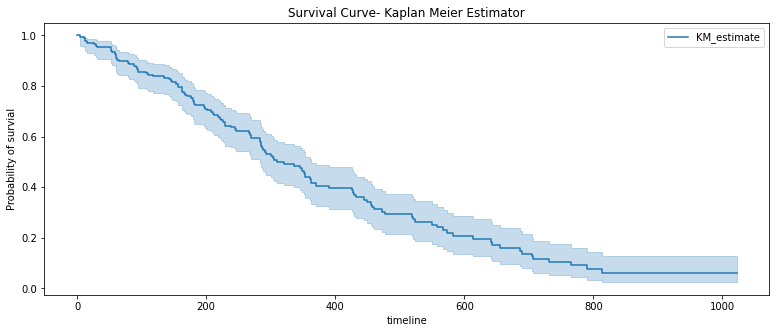

In [ ]:
import matplotlib.pyplot as plt
plt.ylabel("Probability of survial")
plt.title("Survival Curve- Kaplan Meier Estimator")
model.plot(figsize=(13,5))


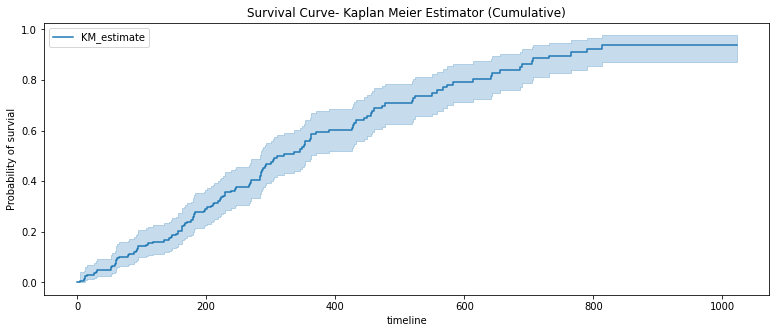

In [ ]:
#Another way of vizualizing our result
import matplotlib.pyplot as plt
plt.ylabel("Probability of survial")
plt.title("Survival Curve- Kaplan Meier Estimator (Cumulative)")
model.plot_cumulative_density(figsize=(13,5))

LOG RANK TEST

In [ ]:
#like t-test, the log rank test is used to test the whether there is significant difference between the inputs.
male=dataset.query('sex==1')
female=dataset.query('sex==2')
male.head(3)


,inst,time,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status_new
1,3.0,455,68,1,0.0,90.0,90.0,1225.0,15.0,1
3,5.0,210,57,1,1.0,90.0,60.0,1150.0,11.0,1
5,12.0,1022,74,1,1.0,50.0,80.0,513.0,0.0,0


In [ ]:
female.head(3)

,inst,time,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,status_new
6,7.0,310,68,2,2.0,70.0,60.0,384.0,10.0,1
7,11.0,361,71,2,2.0,60.0,80.0,538.0,1.0,1
18,1.0,61,56,2,2.0,60.0,60.0,238.0,10.0,1


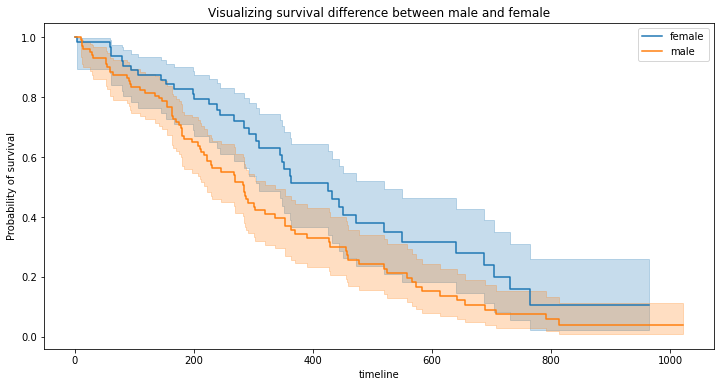

In [ ]:
model_female= KaplanMeierFitter()
model_female.fit(durations=female.time, event_observed=female.status_new)

model_male= KaplanMeierFitter()
model_male.fit(durations=male.time, event_observed=male.status_new)

plt.ylabel("Probability of survival")
plt.title("Visualizing survival difference between male and female")

model_female.plot(figsize=(12,6), label= "female")
model_male.plot(label="male")

In [ ]:
#log rank test
from lifelines.statistics import logrank_test
logrank_test(durations_A=female.time, durations_B=male.time, 
             event_observed_A=female.status_new, event_observed_B=male.status_new)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.05 0.01      6.16

In [ ]:
#since the p-value above is lesser than 0.05, therefore there exists significant difference between the two groups.